<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#線形回帰スクラッチ" data-toc-modified-id="線形回帰スクラッチ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>線形回帰スクラッチ</a></span><ul class="toc-item"><li><span><a href="#【問題1】仮定関数" data-toc-modified-id="【問題1】仮定関数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>【問題1】仮定関数</a></span></li><li><span><a href="#【問題2】最急降下法" data-toc-modified-id="【問題2】最急降下法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>【問題2】最急降下法</a></span></li><li><span><a href="#【問題3】推定" data-toc-modified-id="【問題3】推定-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【問題3】推定</a></span></li><li><span><a href="#【問題4】平均二乗誤差" data-toc-modified-id="【問題4】平均二乗誤差-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>【問題4】平均二乗誤差</a></span></li><li><span><a href="#【問題5】目的関数" data-toc-modified-id="【問題5】目的関数-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>【問題5】目的関数</a></span></li><li><span><a href="#【問題6】学習と推定" data-toc-modified-id="【問題6】学習と推定-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>【問題6】学習と推定</a></span></li><li><span><a href="#【問題7】学習曲線のプロット" data-toc-modified-id="【問題7】学習曲線のプロット-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>【問題7】学習曲線のプロット</a></span></li></ul></li></ul></div>

# Sprint 機械学習スクラッチ 線形回帰

## このSprintについて

### Sprintの目的
* スクラッチを通して線形回帰を理解する
* オブジェクト指向を意識した実装に慣れる
* 数式をコードに落とし込めるようにする

### どのように学ぶか
スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

## 線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。  
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [191]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=0.001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0])
    
        return np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
    
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
    
        
    def fit(self, X, y, X_val=False, y_val=False):
        """
        線形回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # パラメータθの初期値を乱数で与える
        self.theta = np.random.random(2)
        x1 = self._linear_hypothesis(X)
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta)
            
            # 真の値と予測値の誤差を計算
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if (type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
                
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        return np.dot(self._linear_hypothesis(X),self.theta)

### 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。  
メソッドの雛形を用意してあります。  
 $ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\ $

In [130]:
# 関数外でテスト
x1 = np.array([0,1,2,3,4,5,6,7,8,9])
x0 = np.ones(x1.shape[0])
    
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)

In [131]:
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [132]:
theta

array([0.63800329, 0.07954936])

In [133]:
np.dot(X,theta)

array([0.63800329, 0.71755264, 0.797102  , 0.87665136, 0.95620072,
       1.03575007, 1.11529943, 1.19484879, 1.27439815, 1.3539475 ])

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。  
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、  
fitメソッドから呼び出すようにしてください。

In [158]:
# 関数外で一回だけ計算
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)

y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)
theta[0] = theta[0] - alpha*np.mean(error)
theta[1] = theta[1] - alpha*np.mean(error*x1)

In [188]:
np.mean(error)

-1.9883096548491261

In [189]:
np.mean(error*x1)

-6.867764313333438

In [190]:
# thetaの計算を一行で行ってみる
np.dot(error,X)

array([-17.89478689, -61.80987882])

In [297]:
# θの更新を一回してみる
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)
y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)

theta = theta - alpha*np.dot(error,X)/len(X)
print(theta)

[0.61781848 0.7268874 ]


In [296]:
X.shape

(9, 2)

In [290]:
y1.shape

(9,)

In [291]:
y1.reshape(-1,1)

array([[0.86437526],
       [0.96310624],
       [1.06183723],
       [1.16056821],
       [1.2592992 ],
       [1.35803018],
       [1.45676117],
       [1.55549216],
       [1.65422314]])

In [292]:
y.shape

(9,)

In [293]:
error.reshape(-1,1)

array([[-1.13562474],
       [-3.03689376],
       [-0.93816277],
       [ 0.16056821],
       [-4.7407008 ],
       [-5.64196982],
       [-6.54323883],
       [-3.44450784],
       [-0.34577686]])

In [294]:
theta

array([0.89289338, 0.22955473])

### 【問題3】推定
推定する仕組みを実装してください。  
ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数の出力が推定結果です。

In [221]:
X = np.random.randn(30,1)
y = np.random.randn(30,)
X_test = np.random.randn(5,1)

In [235]:
X.max()

1.7090699138301086

In [222]:
print('X.shape',X.shape)
print('y.shape',y.shape)

X.shape (30, 1)
y.shape (30,)


In [252]:
reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, verbose=False)

reg.fit(X,y)
y_pred = reg.predict(X_test)

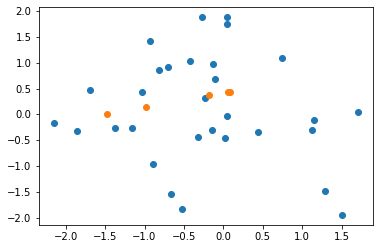

In [254]:
plt.scatter(X,y)
plt.scatter(X_test,y_pred)
plt.plot();

### 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

In [256]:
# 平均二乗誤差
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    
    pass
    return mse

In [262]:
y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])


mse = MSE(y_pred, y_test)
mse

6.8

In [263]:
# 計算結果が正しいか確認
from sklearn.metrics import mean_squared_error

y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])

mean_squared_error(y_test, y_pred)

6.8

### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。

In [264]:
print(reg.loss.shape)
reg.loss.reshape(-1,1)

(10000,)


array([[1.03453363],
       [1.03445434],
       [1.03437506],
       ...,
       [0.62691662],
       [0.62689918],
       [0.62688175]])

In [265]:
print(reg.val_loss.shape)
reg.val_loss.reshape(-1,1)

(10000,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [266]:
# House Pricesのtrainデータを読み込む
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
print('shape:',train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [298]:
X = train[['YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 1)
y.shape: (1460,)


In [299]:
# 訓練データ、検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 1)
y_train.shape: (1168,)
X_valid.shape: (292, 1)
y_valid.shape: (292,)


In [300]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [301]:
reg1 = ScratchLinearRegression(num_iter=10000, lr=0.0001)

reg1.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred1 = reg1.predict(X_valid_std)

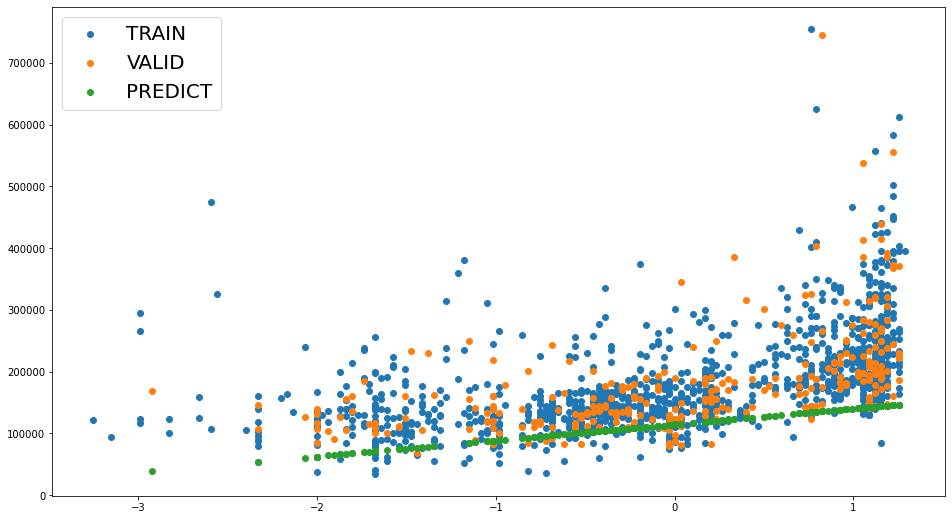

In [302]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred1,label="PREDICT")
plt.legend()
plt.plot();

In [303]:
# 平均二乗誤差
mse = MSE(y_pred1, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE9610141750.0
RMSE98031.3


In [304]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X_train_std,y_train)
y_pred_sklearn = reg2.predict(X_valid_std)

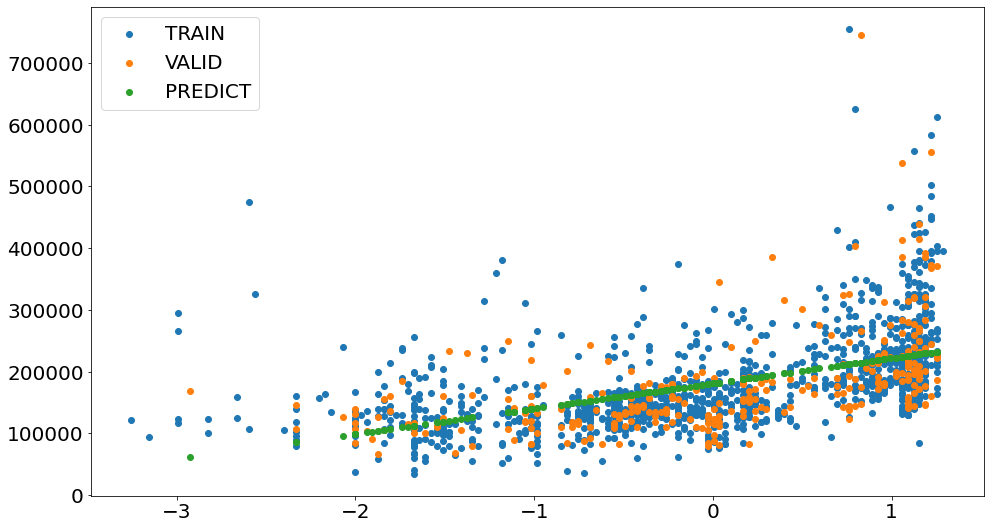

In [305]:
# sklearnによる予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred_sklearn,label="PREDICT")
plt.legend()
plt.plot();

In [306]:
# 平均二乗誤差
mse = MSE(y_pred_sklearn, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


### 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。  
グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、  
入力にはこれを利用してください。

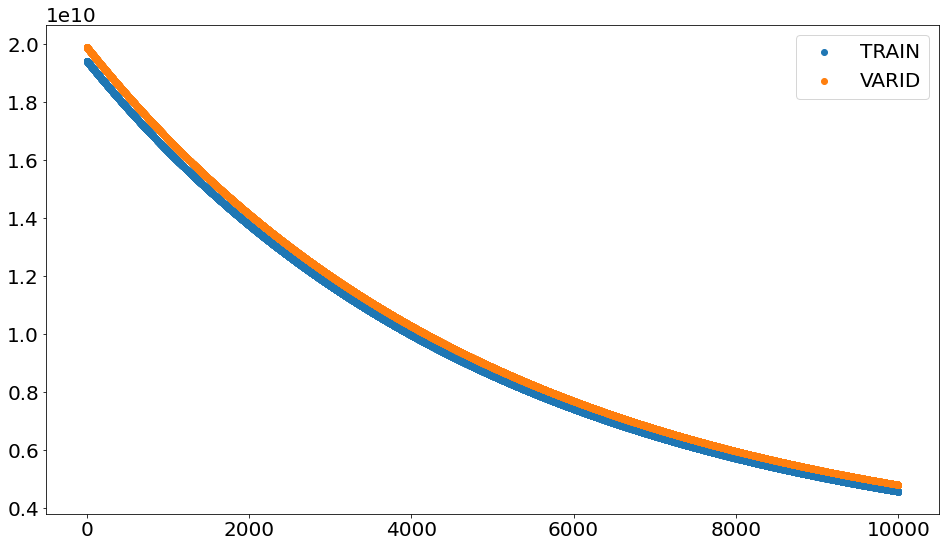

In [307]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg1.loss)),reg1.loss,label='TRAIN')
plt.scatter(range(len(reg1.val_loss)),reg1.val_loss,label='VARID')
plt.legend()
plt.plot();

* 学習率を変えて再予測してみる(lr=0.01)

In [308]:
reg3 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg3.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred3 = reg3.predict(X_valid_std)

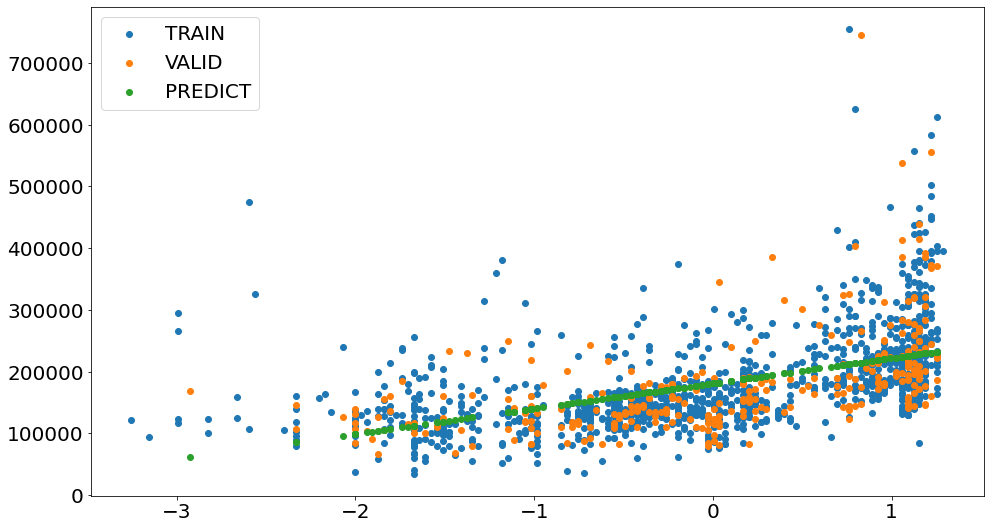

In [309]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred3,label="PREDICT")
plt.legend()
plt.plot();

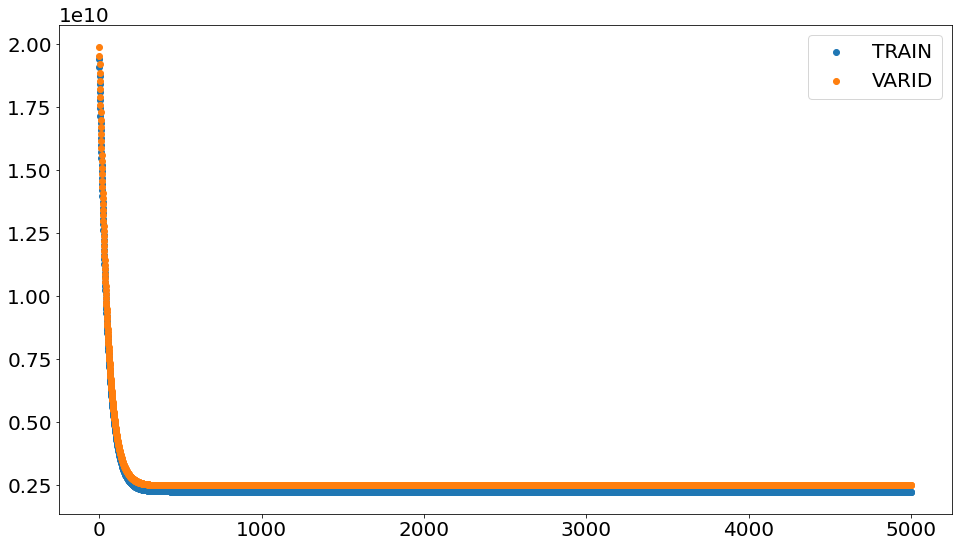

In [310]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg3.loss)),reg3.loss,label='TRAIN')
plt.scatter(range(len(reg3.val_loss)),reg3.val_loss,label='VARID')
plt.legend()
plt.plot();